# 4. Minimalistic composition

The Djalgo package includes well-known minimalistic mathematical operations on notes to create no less rich musical scores. We will cover and merge two kinds of minimalistic operations: deterministic, where the output are consistently determined by the inputs, and stochastic, where we induce randomness. Of course, deterministic composition can be mixed with randomness. We would then refer to generative composition. In this section, I explain how to compose minimalistic, but powerful music with Djalgo.

In [1]:
import djalgo as dj
import itertools
import random

## Isorhythms

The isorhythm consist in mapping durations to pitches. The process can be done by [zipping](https://docs.python.org/3/library/functions.html#zip) together lists of pitches and rhythms, but the [isorhythm](api.html#djalgo.rhythm.isorhythm) function keeps the sequence running as long as the end of pitches and duration coincide, then the offsets will are adjusted to durations.

### Example

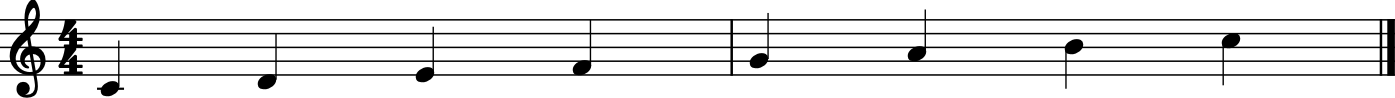

In [2]:
pitches_cmajor = dj.harmony.Scale(tonic='C', scale_type='major').generate()[35:43]
durations = [1] * 8
solfege = dj.rhythm.isorhythm(pitches=pitches_cmajor, durations=durations)
dj.conversion.convert(solfege, to='music21').show()

If the lengths are not factors to each other, the score will expand with interesting patterns. 

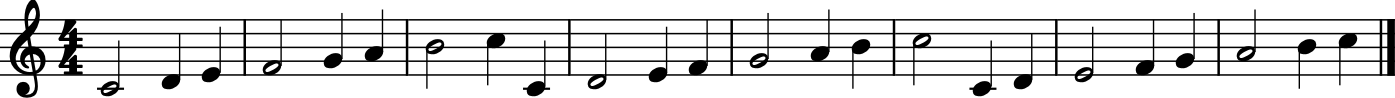

In [3]:
durations = [2, 1, 1] * 8
notes = dj.rhythm.isorhythm(pitches=pitches_cmajor, durations=durations)
dj.conversion.convert(notes, to='music21').show()

### Composition

I use to name my objects as `track1a_` for the first (`a`) part of track `1`, then the description of the object after the underscore `_`. This helps me organizing my composition. Because the lenght of the note list (6 items) differs from that of durations (10 items), and durations sum to 8 with the default time signature, each measure will contain the same durations, but with different notes, providing interesting evolving patterns. In the plan, I aimed to create a melody in E major.

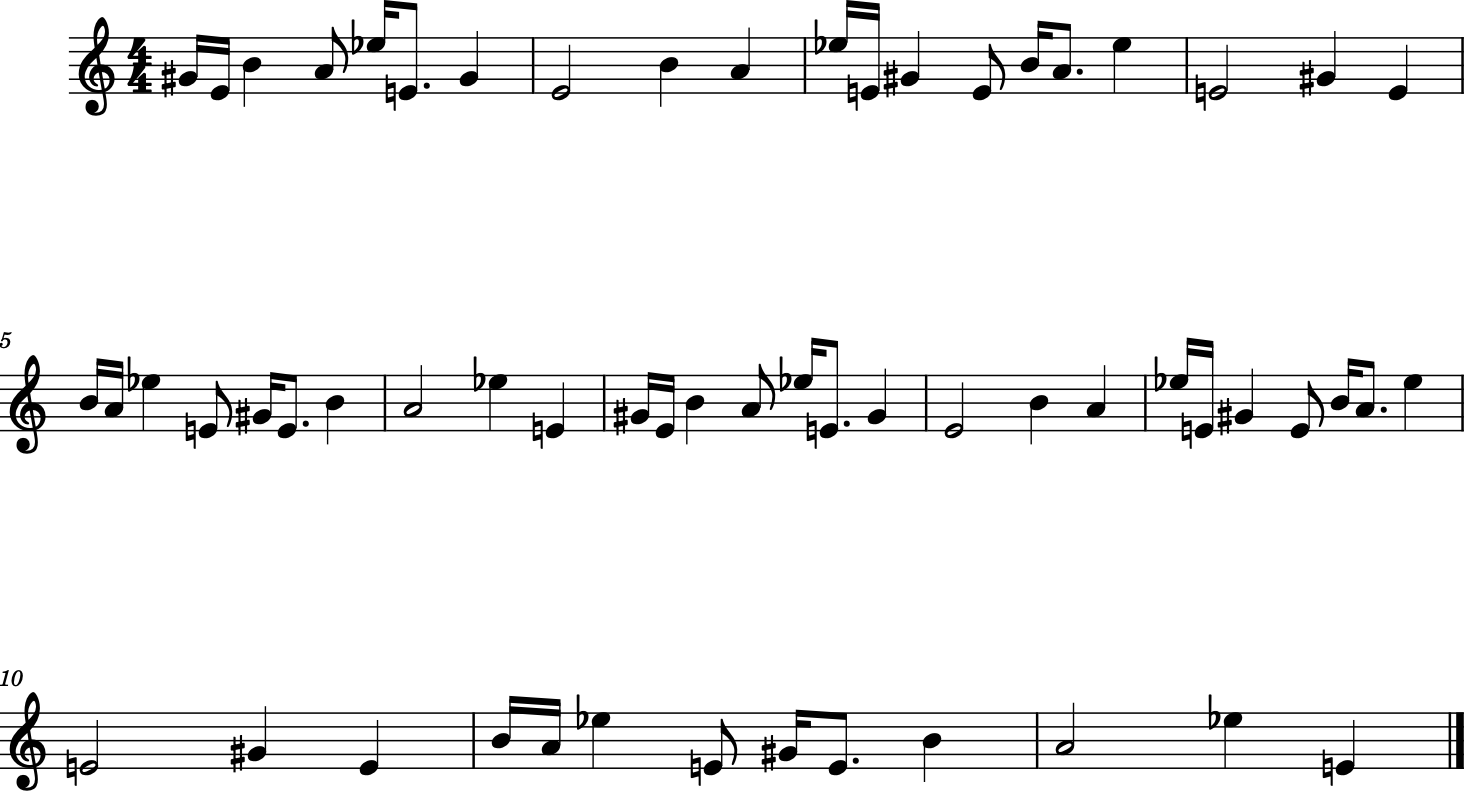

In [4]:
track1a_p = [68, 64, 71, 69, 75, 64] * 5 # _p for pitch, 30 items in E major
track1a_d = [0.25, 0.25, 1, 0.5, 0.25, 0.75, 1, 2, 1, 1] * 2 # _d for durations, 30 items
track1a_n = dj.rhythm.isorhythm(pitches=track1a_p, durations=track1a_d)
dj.conversion.convert(track1a_n, to='music21').show()
dj.conversion.convert(track1a_n, to='music21').show('midi')

## Additive and subtractive processes

A forward additive process on [A, B, C, D] will take the first note, then the first and second, then first, second and third and so on as [A, A, B, A, B, C, A, B, C, D]. Two repetitions will expand the melody more slowly, as [A, A, A, B, A, B, A, B, C, A, B, C, A, B, C, D, A, B, C, D]. Instead of adding the notes gradually, a subtractive process removes them. A forward subtractive process with one repetition will go as [A, B, C, D, B, C, D, C, D, D]. 

### Example

To show what is an additive process, let's take the solfege. I will apply additive and subtractive processes, forward and backward on C4, D4, E4, F4, G4, A4, B4, C5. First, the **additive forward process** grows by iteratively adding the next note from the begining.

    C4,
    C4, D4,
    C4, D4, E4,
    C4, D4, E4, F4,
    C4, D4, E4, F4, G4,
    C4, D4, E4, F4, G4, A4, 
    C4, D4, E4, F4, G4, A4, B4, 
    C4, D4, E4, F4, G4, A4, B4, C5

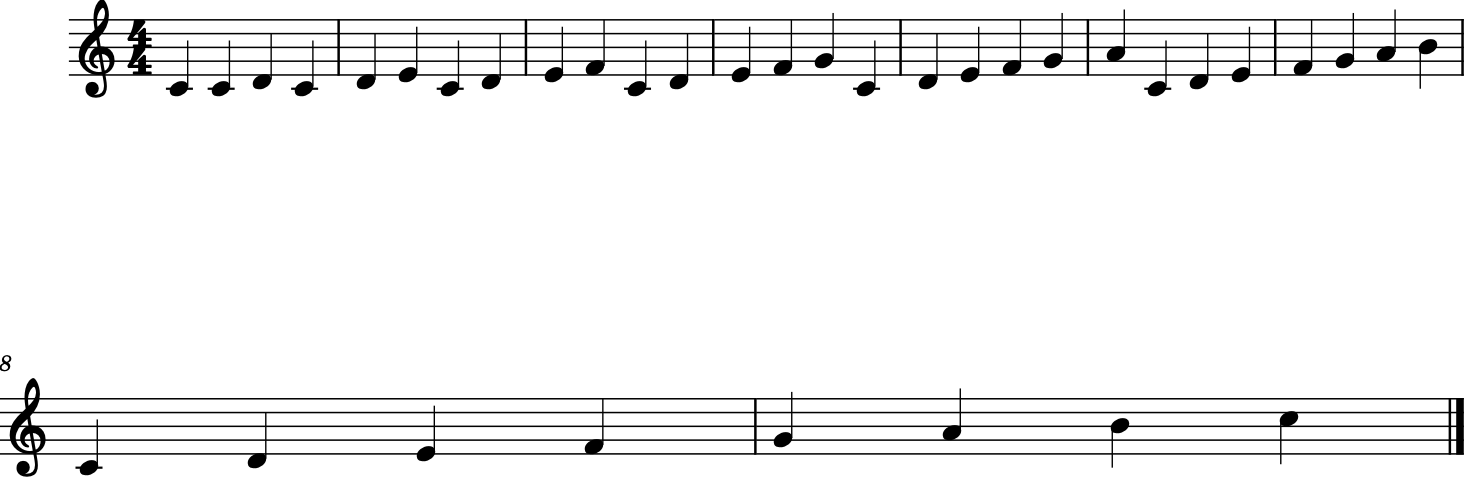

In [5]:
af_process = dj.minimalism.Minimalism.Process(operation='additive', direction='forward')
dj.conversion.convert(af_process.generate(solfege), to='music21').show()

The **additive backward process** grows from the end of the melody and iteratively adds the previous one.

    C5,
    B4, C5,
    A4, B4, C5,
    G4, A4, B4, C5,
    F4, G4, A4, B4, C5,
    E4, F4, G4, A4, B4, C5,
    D4, E4, F4, G4, A4, B4, C5,
    C4, D4, E4, F4, G4, A4, B4, C5

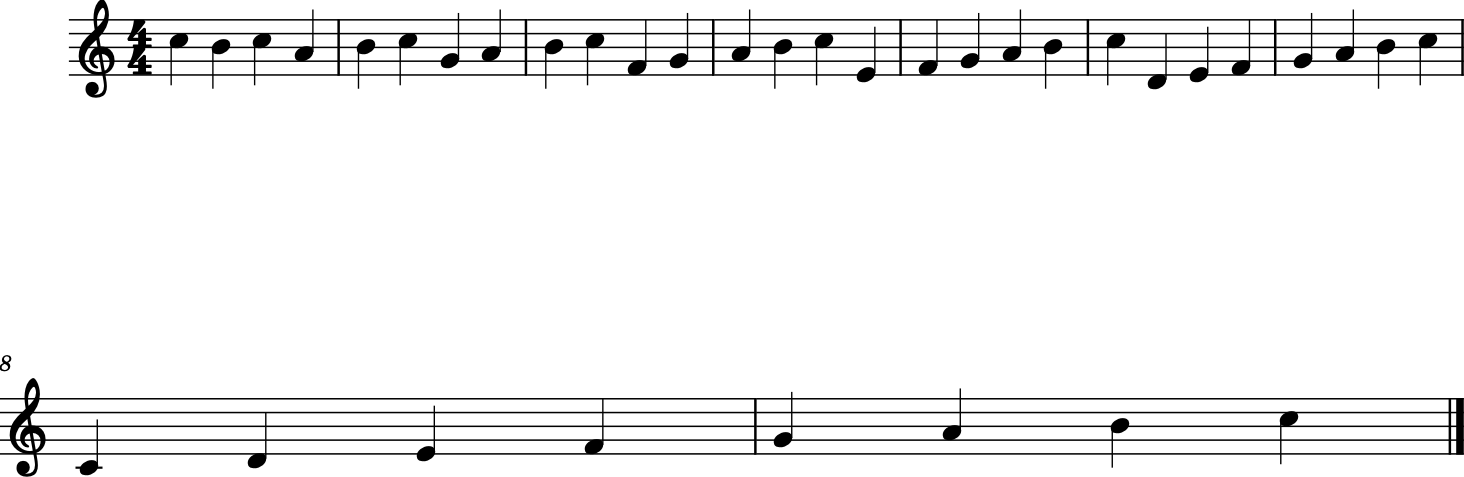

In [6]:
ab_process = dj.minimalism.Minimalism.Process(operation='additive', direction='backward')
dj.conversion.convert(ab_process.generate(solfege), to='music21').show()

Subtractive processes inverse the triangles I presented. The **subtractive forward process** plays the whole melody then iteratively removes the **first** note.

    C4, D4, E4, F4, G4, A4, B4, C5,
    D4, E4, F4, G4, A4, B4, C5,
    E4, F4, G4, A4, B4, C5,
    F4, G4, A4, B4, C5,
    G4, A4, B4, C5,
    A4, B4, C5,
    B4, C5,
    C5

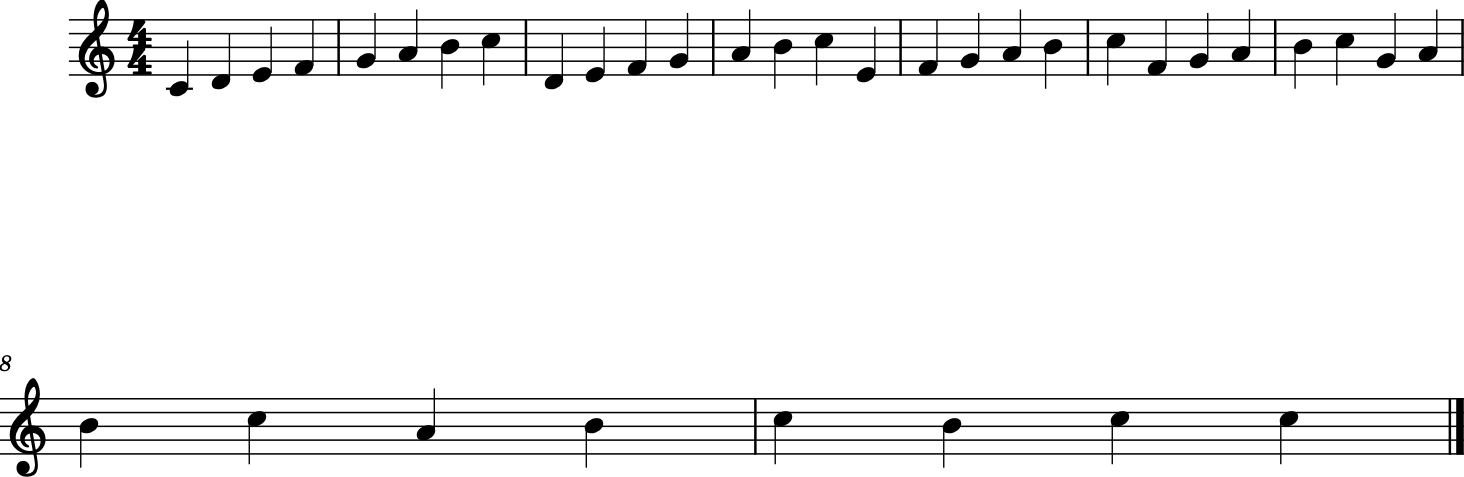

In [7]:
sf_process = dj.minimalism.Minimalism.Process(operation='subtractive', direction='forward')
sf_process = sf_process.generate(solfege)
dj.conversion.convert(sf_process, to='music21').show()

The **subtractive backward process** plays the whole melody then iteratively removes the **last** note.

    C4, D4, E4, F4, G4, A4, B4, C5,
    C4, D4, E4, F4, G4, A4, B4,
    C4, D4, E4, F4, G4, A4,
    C4, D4, E4, F4, G4,
    C4, D4, E4, F4,
    C4, D4, E4,
    C4, D4,
    C4

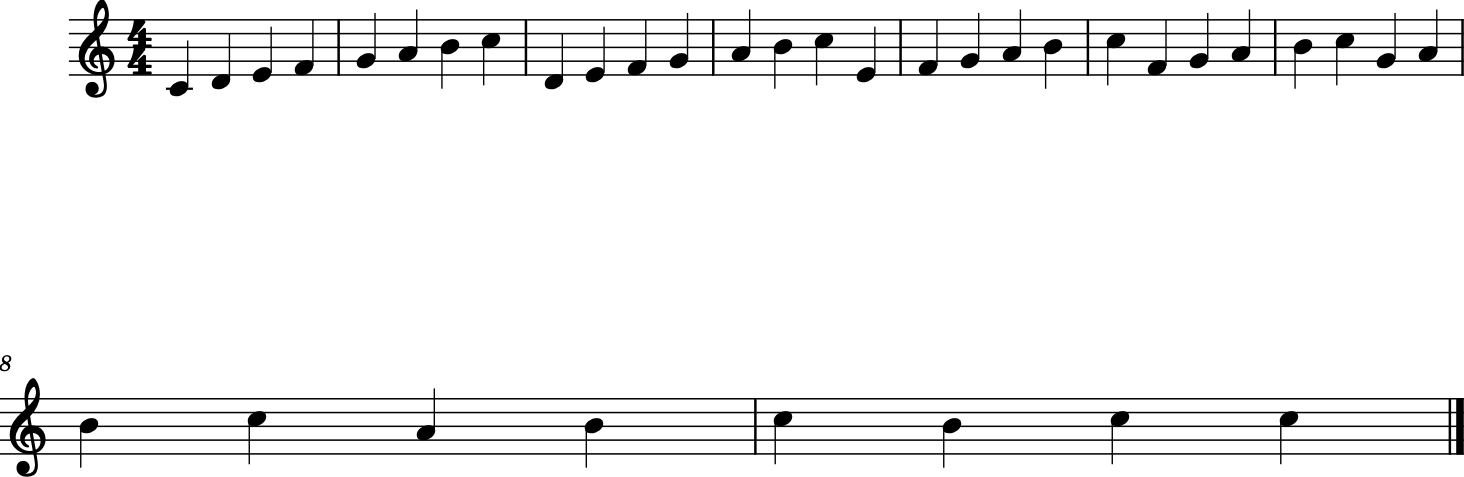

In [8]:
sf_process = dj.minimalism.Minimalism.Process(operation='subtractive', direction='forward')
sf_process = sf_process.generate(solfege)
dj.conversion.convert(sf_process, to='music21').show()

There are four other use cases involving inward and outward directions in additive and subtracting processes, as well as an option for repetitions, which are covered in the API of the [minimalism module of Djalgo](api.html#djalgo.minimalism.Minimalism). While the outcome of additive and subtractive processes is predictible for simple melodies, complex melodies can expand or shrink to intersting patterns. Unless you have a precise mathematical framework in mind, my suggestion is to empirically try combinaisions of processes and arguments that sound good to your ears, then investigate what you are really doing with a solfege. However, if the initial melody is long, these processes can expand to very long pieces and become quite boring.

Let's try additive processes on our composition.

### Composition

I planned to append an additive and a subtractive process to track 1, in E minor. Let's first create a melody.

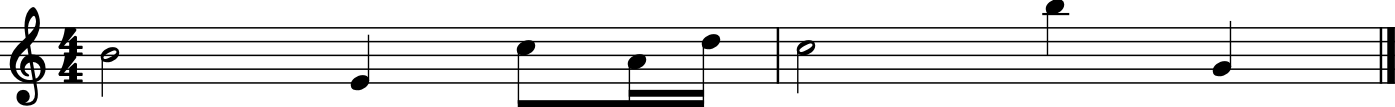

In [9]:
base_pitches = [71, 64, 72, 69, 74, 72, 83, 67] # 8 notes in E minor
base_durations = [2.0, 1.0, 0.5, 0.25, 0.25, 2.0, 1.0, 1.0]
track1b_base = dj.rhythm.isorhythm(pitches=base_pitches, durations=base_durations)
dj.conversion.convert(track1b_base, to='music21').show()

I use an additive forward process and a subtractive backward process. But I prefer to keep durations steady instead of hardly attaching durations to notes.

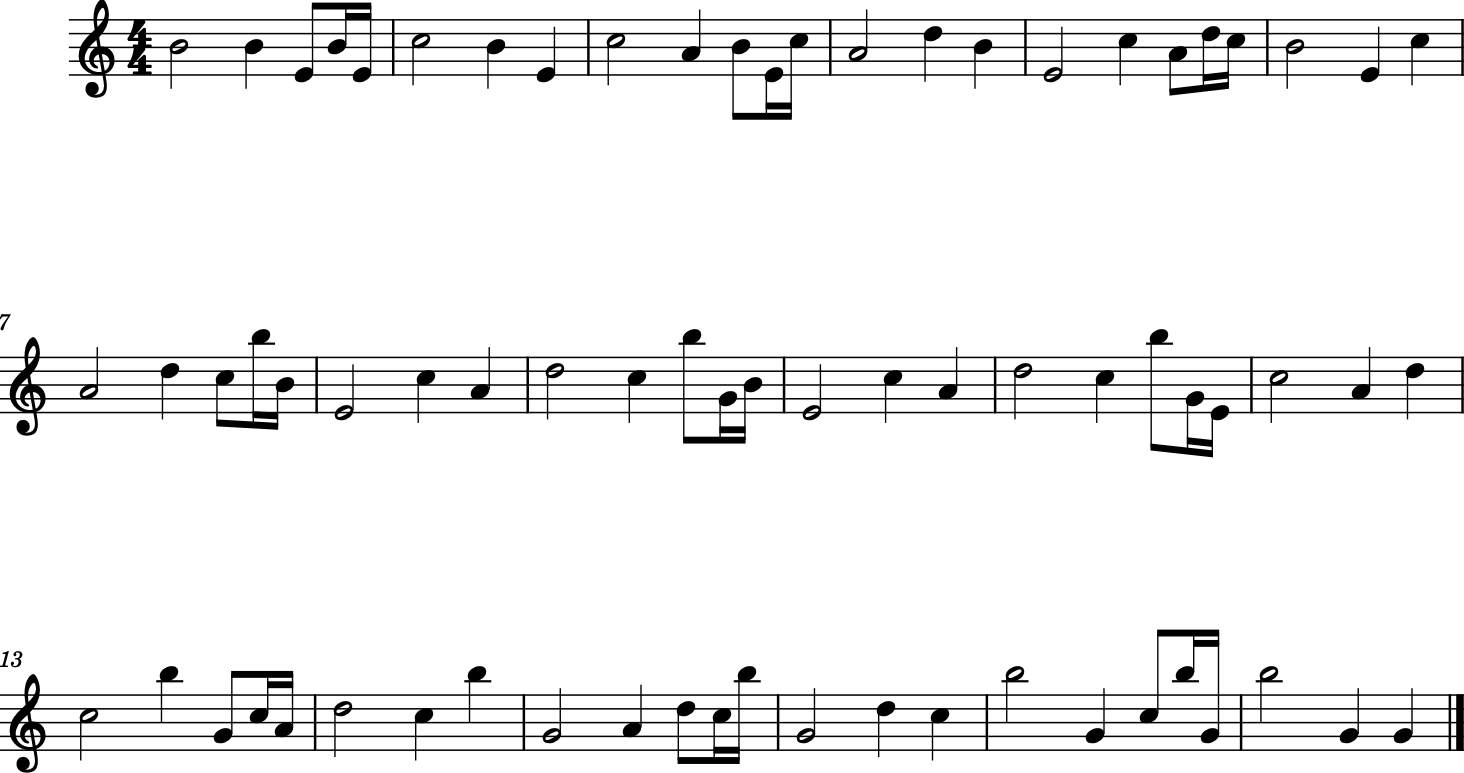

In [10]:
track1b_n = dj.minimalism.Minimalism.Process(operation='additive', direction='forward').generate(track1b_base)
track1b_n.extend(
    dj.minimalism.Minimalism.Process(operation='subtractive', direction='backward').generate(track1b_base)
)

track1b_nir = []
current_offset = 0
base_duration_cycle = itertools.cycle(base_durations)
for n in track1b_n:
    duration_n = next(base_duration_cycle)
    track1b_nir.append((n[0], duration_n, current_offset))
    current_offset += duration_n

dj.conversion.convert(track1b_nir, to="music21").show()
dj.conversion.convert(track1b_nir, to="music21").show('midi')

The minor scale sounds sad and intriguing, and somewhat dissonant. But it sounds incomplete, like a distress without conclusion. I need to conclude the piece like it began, but somewhat differently.

## Shuffling

Shuffling is moving around items in a list. It can be pitches, durations, lists of notes, etc. While shuffling durations will largely change the shape of the melody, shuffling pitches is a reboot of the same rhythmic pattern. Shuffling is the only stochastic (random) process I am going to use in this section. I will use the *random* package, which comes with standard Python installations.

### Example

I create a function that extracts the pitches, shuffles them, then assembles them again in a new list. Just like the `.append()` method, `random.shuffle()` is done *in place* (in place means that the object is modified by the applied method - assigning inplace methods to a new variable will likely cause an error). I use a seed number so that each time I run the random process, I obtain the exact same result.

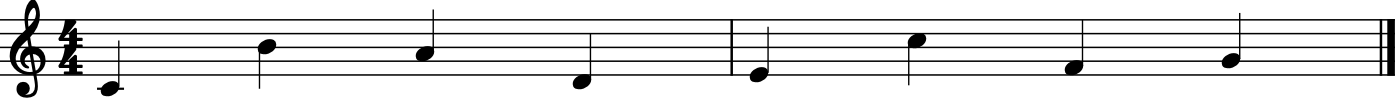

In [11]:
random.seed(4698801)

def shuffle_pitches(sequence):
    pitches = [note[0] for note in sequence]
    random.shuffle(pitches)
    shuffled_sequence = [(pitches[i], note[1], note[2]) for i, note in enumerate(sequence)]
    return shuffled_sequence

solfege_shuffle = shuffle_pitches(solfege)
dj.conversion.convert(solfege_shuffle, to='music21').show()

### Composition

I use shuffling here to give a sence of completion after the additive / subtractive processes, by randomly moving the notes a `track1a_m`. I changed the seed until I obtain something I like.

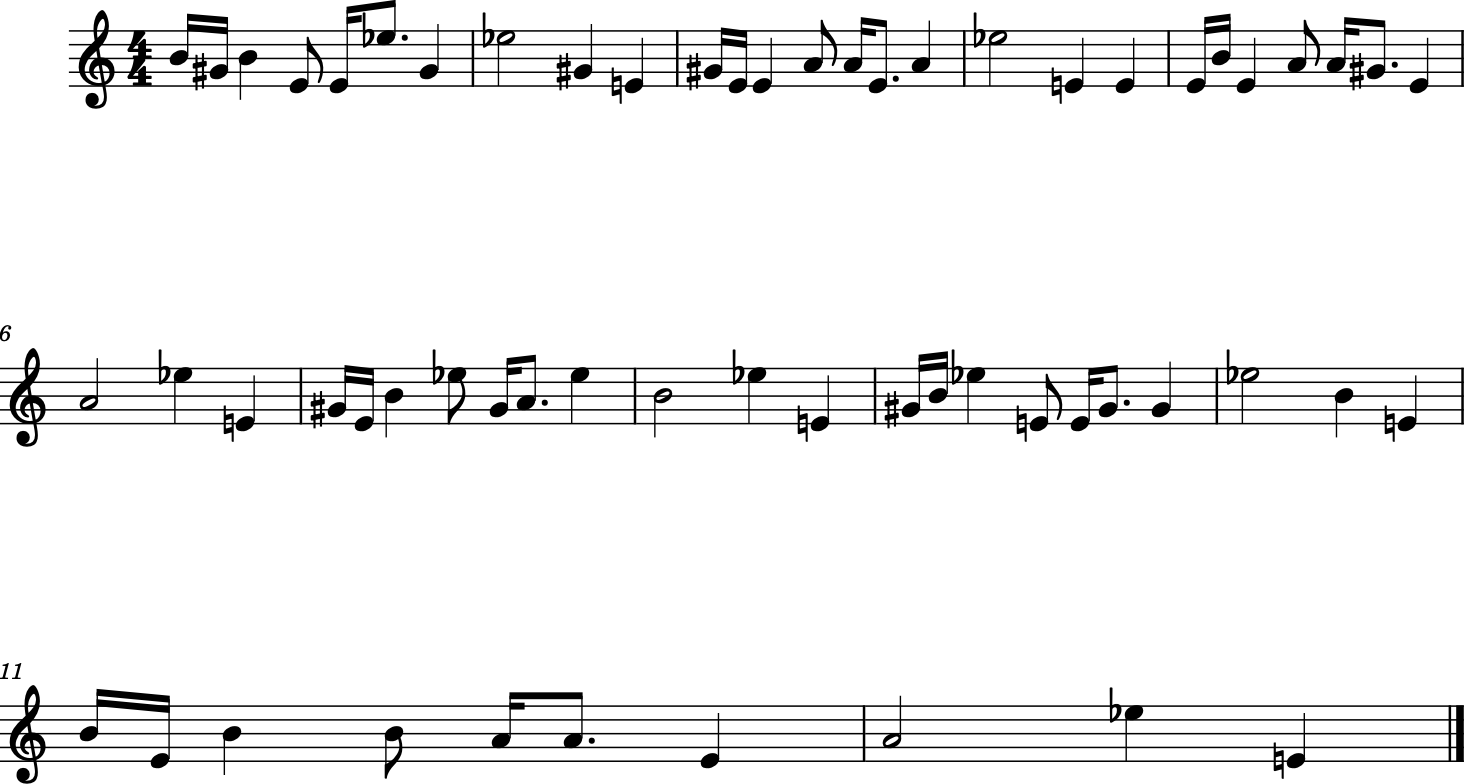

In [12]:
random.seed(38745638)
track1c_n = shuffle_pitches(track1a_n)
dj.conversion.convert(track1c_n, to='music21').show()
dj.conversion.convert(track1c_n, to='music21').show('midi')

It still sounds monotone. A tintinnabuli might enrich the piece.

## Tintinnabuli

The tintinnabuli is a procedural music composition technique developped by the classical composer [Arvo Pärt](https://en.wikipedia.org/wiki/Arvo_P%C3%A4rt) to create spiritual christian sounds, but amenable to styles at the limit of your imagination. A tintinnabuli is made of two tracks : a melody we call the *m-voice*, and a counterpoint we call the *t-voice* (*t* for tintinnabuli), generated from the *m-voice*.

The *t-voice* copy-pastes each note from the *m-voice*, then alters the pitch following a systematic rule used through a musical piece. Rules can really be anything, but the tintinnabuli consists in providing a *t-chord*, and for each note of the *m-voice*, get the pitch in the *t-chord* that is the closest to the pitch of the *m-voice* through a given direction: up, down, any or alternate. The *t-chord* can be anything, but it typically is a major or a minor triad. When you generate your Tintinnabuli Python object, for each note in the *m-voice*, the *t-voice* will rank the the next (higher pitch) or previous (lower pitch) notes in the *t-chord* depending of the direction you selected, then will select the rank from the position you specified. Each note in the *m-voice* will have its corresponding note in the *t-voice*, with the same duration.

### Example

For instance, I define the t-chord of my t-voice as a C major triad C, E G, I set direction to "up" and the rank to 1. The first note of my melody (m-voice) is a C4. Can you guess the t-voice? You go up from the C4, the next in your chord is E. But you chose position 2, so you look for the next, G. And it will be a G4 since you went up from the C4.

Let's try the same t-voice properties on a simple monotonic C scale as the m-voice.

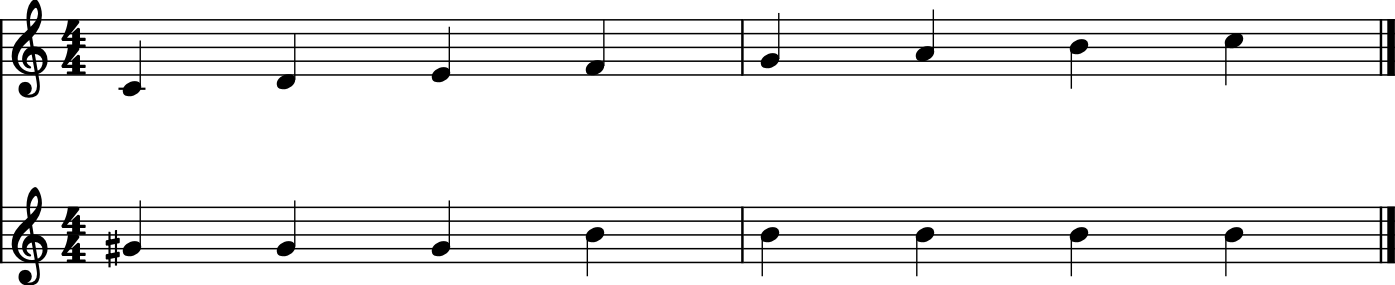

In [13]:
m_voice = solfege
t_voice = dj.minimalism.Minimalism.Tintinnabuli(
    t_chord=[64, 68, 71], direction='up', rank=1
).generate(solfege)
dj.conversion.convert([m_voice, t_voice], to='music21').show()

While the m-voice grows continuously, the t-voice grows more stepwise. See how the t-voice is restricted to the notes we set in `t_chord = [60, 64, 67]`. You can choose any chord and position and going up with `direction = "up"` or down with `direction = "down"`. Djalgo even allows to alternate between up and down with `"alternate"` or to the nearest on `"any"` direction.

### Composition

I will add t-voices to track 1 as the m-voice. I'll add an up t-voice on a C major triad on position 1 for `track1a_m`. For `track1b_m` the t-voice will be down at position 2 on C minor triad and aumented 7th. And for the *c* part, let's be fancy and use an up alternate on C major augmented 7th with position 2 while increasing the pitch on a full octave (perfect 8).

In [14]:
track2a_n = dj.minimalism.Minimalism.Tintinnabuli(
    t_chord=[60, 64, 67], direction='up'
).generate(track1a_n)

track2b_n = dj.minimalism.Minimalism.Tintinnabuli(
    t_chord=[60, 63, 67, 70], direction='down'
).generate(track1b_n)

track2c_n = dj.minimalism.Minimalism.Tintinnabuli(
    t_chord=[60, 64, 67, 70], direction='alternate'
).generate(track1c_n)

Before assembling the a, b and c parts of the tracks, I need to correct the offset since `track1a_n` ends at 47 `track1b_n` starts at zero.

In [16]:
print('Track 1a', track1a_n[-5:])
print('Track 1b',track1b_n[:5])

Track 1a [(64, 0.75, 42.25), (71, 1, 43.0), (69, 2, 44.0), (75, 1, 46.0), (64, 1, 47.0)]
Track 1b [(71, 2.0, 0), (71, 2.0, 2.0), (64, 1.0, 4.0), (71, 2.0, 5.0), (64, 1.0, 7.0)]


In [17]:
print('Track 1a', track1b_n[-5:])
print('Track 1b',track1c_n[:5])

Track 1a [(83, 1.0, 29.75), (67, 1.0, 30.75), (83, 1.0, 31.75), (67, 1.0, 32.75), (67, 1.0, 33.75)]
Track 1b [(71, 0.25, 0), (68, 0.25, 0.25), (71, 1, 0.5), (64, 0.5, 1.5), (64, 0.25, 2.0)]


In fact, I want `track1b_n` to start at 48 and `track1c_n` to start at 48+36. I will fix this in the next cell.

In [18]:
track1b_n = [(pitch, duration, offset + 48) for pitch, duration, offset in track1b_n]
track1c_n = [(pitch, duration, offset + 48 + 36) for pitch, duration, offset in track1c_n]

The following block creates the tracks, then assembles them together.

In [19]:
track1 = track1a_n + track1b_n + track1c_n
track2 = track2a_n + track2b_n + track2c_n
dj.conversion.convert([track1, track2], to='music21').show('midi')

The music still sounds quite dull because the t-voice is always played at the same time steps as the m-voice. Let's be a bit innovative here and offset the t-voice by a quarter length, on part *b* only.

In [20]:
track2b_offset = [(note[0], note[1], note[2] + 1) for note in track2b_n]
track2 = track2a_n + track2b_offset + track2c_n
dj.conversion.convert([track1, track2], to='music21').show('midi')

I like that! But... it lacks rhythm.

## Voicing

Chords can be used to add a rhytmic structure, a feel of predictibility to make my piece sounds less experimental and more enjoyable. A way of procedurally adding chords is to extract the first note of each measure as root for chords. I could extract all first beats per measure, but in cases where the note from the previous measures continues trough the next, there is no beat 1. So my strategy is to iteratively split the track at each four quarter lenghts, then extract the first note of the second part of the split.

### Example

For the example, I will alter the durations of the solfege. I'll make a copy of it to avoid altering my initial object.

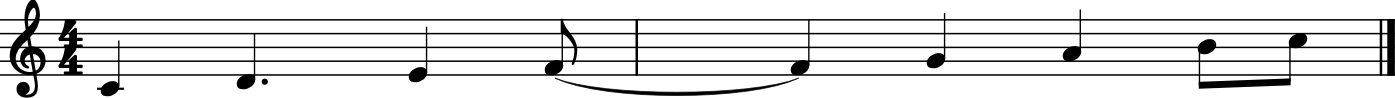

In [30]:
solfege_alterdur = dj.rhythm.isorhythm(pitches=[pitch for pitch, _, _ in solfege], durations=[1, 1.5, 1, 1.5, 1, 1, 0.5, 0.5])
dj.conversion.convert(solfege_alterdur, to='music21').show()

A utility function cuts the measures, grabs the first note then spit out the note with the length of the measure. To dynamically create the adequate number of notes at the beginning of each measure, I computed the number of measures of the `solfege_alterdur` track, given the length of each measure.

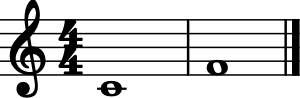

In [31]:
import math # to compute the rounded to up, i.e. ceiling, math.ceil
measure_length = 4
end_of_track = solfege_alterdur[-1][2] + solfege_alterdur[-1][1] # [2] is the offset, [1] is the duration
number_of_measures = math.ceil(end_of_track / measure_length)
closest_pitches = dj.utils.find_closest_pitch_at_measure_start(solfege_alterdur, measure_length=measure_length)
solfege_alterdur_d = [measure_length]*number_of_measures
solfege_alterdur_cp = dj.rhythm.isorhythm(pitches=closest_pitches, durations=solfege_alterdur_d)
dj.conversion.convert(solfege_alterdur_cp, to='music21').show()

Voicing was introduced in the [Pythonic Harmonies](02_harmony.html) section.

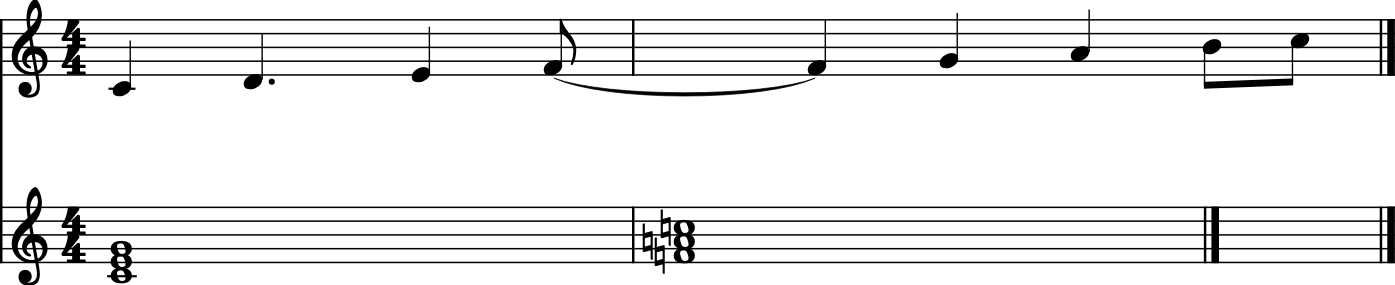

In [32]:
voice = dj.harmony.Voice(
    tonic = 'C',
    scale_type = 'major',
    degrees=[0, 2, 4]
).generate(pitches=[pitch for pitch, _, _ in solfege_alterdur_cp])
solfege_alterdur_voice = dj.rhythm.isorhythm(pitches=voice, durations=solfege_alterdur_d)
dj.conversion.convert([solfege_alterdur, solfege_alterdur_voice], to='music21').show()

### Composition

I created chords for each first notes of the whole track 1, then lower the pitch to an octave (pecfect 8). Because I want major chords on *a*, minor chords on *b* and back to major on *c*, I will split the operations in three parts. Note that this is not how music theory really works, and some of the chords will sound dissonant. But I'm fine with some dissonance for this piece, so let this question simmer. Because in my previous operations the tracks are in fact streams of streams, I used the `.flatten()` method, which remove a hierarchical level in streams.

In [33]:
measure_length = 4
track3 = []

for track, scale_type in zip([track1a_n, track1b_n, track1c_n], ['major', 'minor', 'major']):
    end_of_track = track[-1][2] + track[-1][1]
    number_of_measures = math.ceil(end_of_track / measure_length)
    closest_pitches = dj.utils.find_closest_pitch_at_measure_start(track, measure_length=measure_length)
    voice_pitches = dj.harmony.Voice(
        tonic = 'E',
        scale_type = scale_type,
        degrees=[0, 2, 4]
    ).generate(pitches=closest_pitches)
    voice_notes = dj.rhythm.isorhythm(pitches=voice_pitches, durations=[measure_length]*number_of_measures)
    track3 = track3 + voice_notes

Putting the three tracks together...

> The `.show()` method caused an error that I'm not sure how to handle.

In [35]:
max_offset = 30
filtered_track1 = [note for note in track1 if note[2] < max_offset]
filtered_track2 = [note for note in track2 if note[2] < max_offset]
filtered_track3 = [note for note in track3 if note[2] < max_offset]
tracks = []
tracks.append(filtered_track1)
tracks.append(filtered_track2)
tracks.append(filtered_track3)
dj.conversion.convert(tracks, to='music21').show('midi')

It's kind of messy, but sounds pretty good to me! Since I'm satisfied with this piece, I export the tracks to the midi format in the aim of import them in my digital audio workstation (DAW).

In [ ]:
!mkdir music
dj.conversion.convert(tracks, to='music21').write("midi", fp = "music/minimalism_tracks.midi")

I used free instruments of Spitfire Audio LABS and Tracktion Waveform Free as DAW to create the piece from our midi files. These are free, so if you want to play with midi files and rich sounds, these softwares are very good starts. After some assembly, duplicated tracks to different instruments and mastering, I published my piece on Soundcloud.

<iframe width="100%" height="150" scrolling="no" frameborder="no" allow="autoplay" src="https://w.soundcloud.com/player/?url=https%3A//api.soundcloud.com/tracks/1295425996&color=%23ff5500&auto_play=false&hide_related=false&show_comments=true&show_user=true&show_reposts=false&show_teaser=true&visual=true"></iframe><div style="font-size: 10px; color: #cccccc;line-break: anywhere;word-break: normal;overflow: hidden;white-space: nowrap;text-overflow: ellipsis; font-family: Interstate,Lucida Grande,Lucida Sans Unicode,Lucida Sans,Garuda,Verdana,Tahoma,sans-serif;font-weight: 100;"><a href="https://soundcloud.com/user-512016957-418252282" title="motife" target="_blank" style="color: #cccccc; text-decoration: none;">motife</a> · <a href="https://soundcloud.com/user-512016957-418252282/arvo-ensemble-006" title="Arvo ensemble 006" target="_blank" style="color: #cccccc; text-decoration: none;">Arvo ensemble 006</a></div>